## Comparing Changes

### US/Canada level 1

In [1]:
import geoplanar
import geopandas as gpd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal

In [4]:
import pandas as pd

### Data Retrieval

In [5]:
npe = gpd.read_parquet("nonplanar_enforced.parquet") #non planar enforced data


In [6]:
pe = gpd.read_parquet("planar_enforced.parquet") # planar enforced


In [7]:
npe = npe.set_crs('epsg:3857')
pe= pe.set_crs('epsg:3857')

In [8]:
pe.columns

Index(['level_0', 'geometry', 'COUNTRY', 'index', 'AREA', 'PERIMETER',
       'STATE_', 'STATE_ID', 'STATE_NAME', 'STATE_FIPS', 'SUB_REGION',
       'STATE_ABBR', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1',
       'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1'],
      dtype='object')

In [9]:
US = pe[pe['COUNTRY'].isin(['US'])]
CANADA= pe[pe['COUNTRY'].isin(['CANADA'])]

<AxesSubplot:>

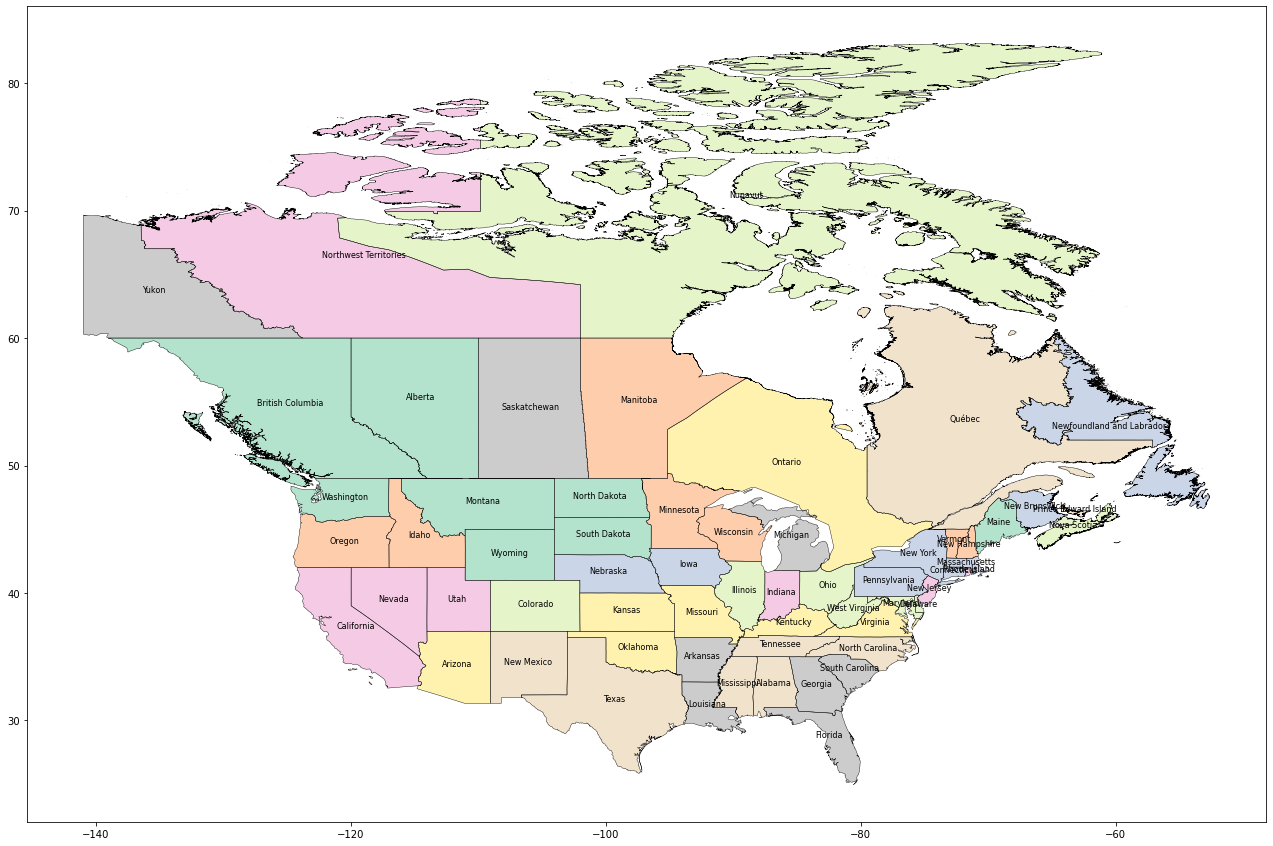

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
US.apply(lambda x: ax.annotate(text=x['STATE_NAME'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=8),axis=1);
US.boundary.plot(ax=ax, color='Black', linewidth=.4)
US.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
CANADA.apply(lambda x: ax.annotate(text=x['NAME_1'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=8),axis=1);
CANADA.boundary.plot(ax=ax, color='Black', linewidth=.4)
CANADA.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))


### Changes in Centroids 

In [11]:
npe_cen= npe.centroid # non planar enforced data
npe_cen.head()

0     POINT (-86.779 45.480)
1     POINT (-82.467 42.882)
2     POINT (-82.751 42.535)
3    POINT (-120.427 47.377)
4    POINT (-109.652 47.032)
dtype: geometry

In [12]:
pe_cen= pe.centroid #planar enforced data
pe_cen.head()

0     POINT (-86.779 45.480)
1     POINT (-82.467 42.882)
2     POINT (-82.751 42.535)
3    POINT (-120.427 47.377)
4    POINT (-109.652 47.032)
dtype: geometry

Text(-0.05, 0.5, 'Centroids on Map of US and Canada')

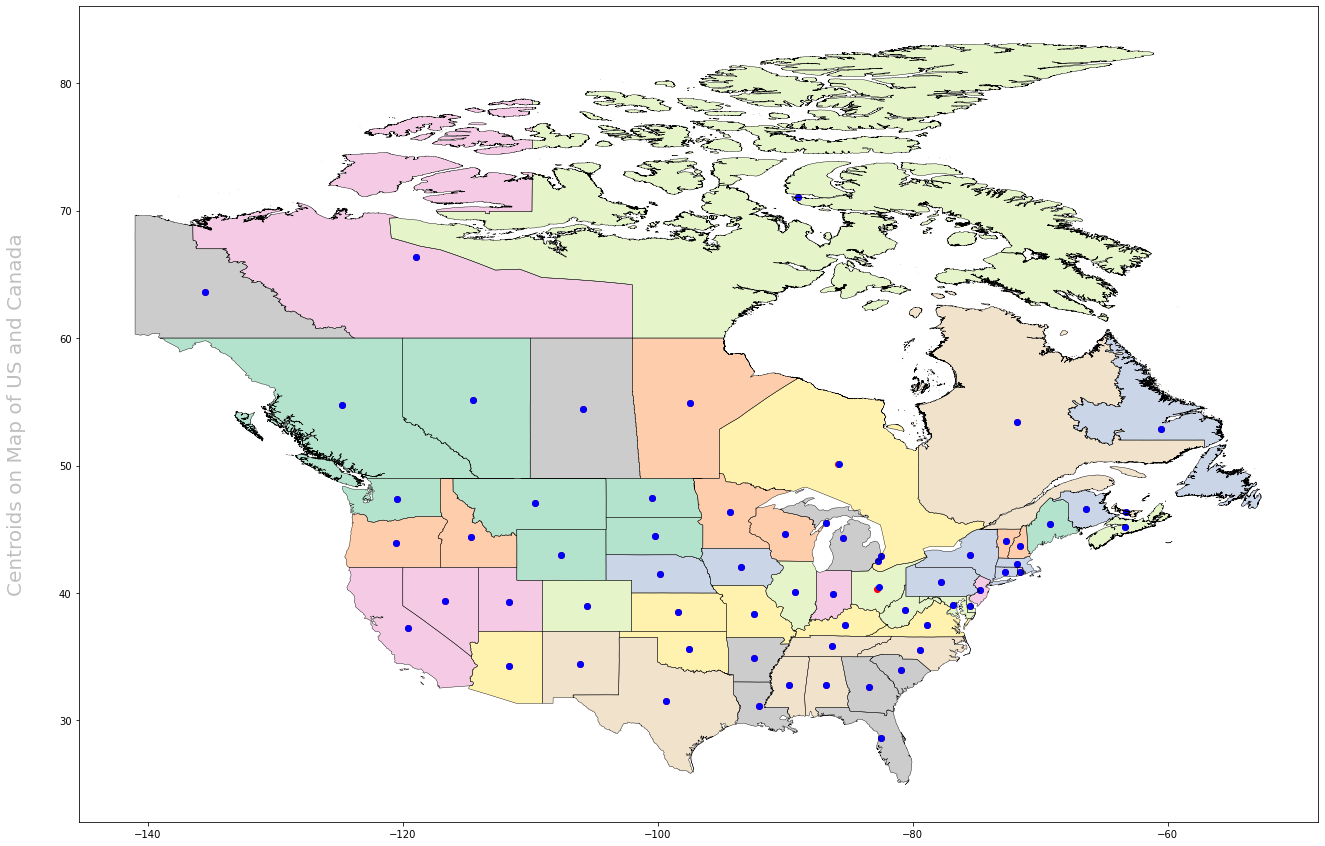

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
US.boundary.plot(ax=ax, color='Black', linewidth=.4)
US.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
CANADA.boundary.plot(ax=ax, color='Black', linewidth=.4)
CANADA.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
npe_cen.plot(ax=ax, color='red') # centroid for non planar
pe_cen.plot(ax=ax, color='blue')# centroid for planar enforced data
ax.text(-0.05, 0.5, "Centroids on Map of US and Canada", transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

### Subset for Ohio a Polygon

In [14]:
Ohio_npe = npe[npe.STATE_NAME=="Ohio"] 

In [15]:
Ohio_pe = pe[pe.STATE_NAME=="Ohio"] 

In [16]:
Ohio_pe.geometry

27    POLYGON ((-83.618 38.678, -83.633 38.665, -83....
Name: geometry, dtype: geometry

In [17]:
Ohio_npe.geometry

27    POLYGON ((-83.273 38.609, -83.290 38.597, -83....
Name: geometry, dtype: geometry

In [18]:
Ohio_pe_centroid= Ohio_pe.centroid
Ohio_npe_centroid= Ohio_npe.centroid


<AxesSubplot:>

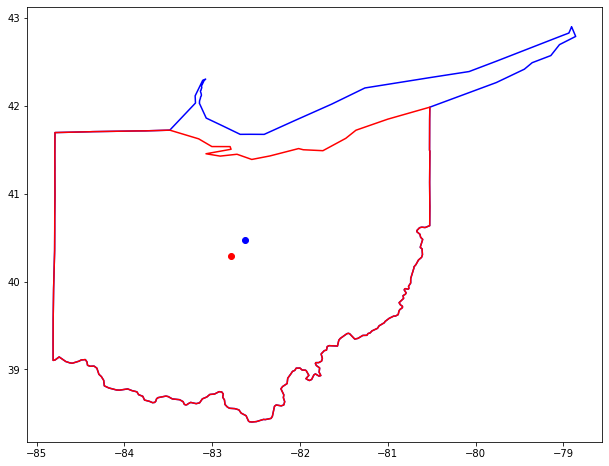

In [19]:
base =Ohio_pe.geometry.boundary.plot(edgecolor='blue', figsize=(15, 8))
Ohio_npe.geometry.boundary.plot(ax=base, color='red')
Ohio_npe_centroid.plot(ax=base, color='red')
Ohio_pe_centroid.plot(ax=base, color='blue')

## 1. Comparison of Centroids 

In [20]:
# geom_equals
pe['equals'] = npe_cen.geom_equals(pe_cen, align=False) 

# geom_almost_equals with 5 decimals
pe['almost_equals'] = npe_cen.geom_almost_equals(pe_cen, decimal=5)

#  geom_almost_equals with all of centroid decimals
pe['almost_equals_full'] = npe_cen.geom_almost_equals(pe_cen, decimal=14)

# geom_equals_exact with .00001 tolerance
pe['equals_exact'] = npe_cen.geom_equals_exact(pe_cen, tolerance=.00001, align=False)

In [21]:
pe.head()

,level_0,geometry,COUNTRY,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,...,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,equals,almost_equals,almost_equals_full,equals_exact
0,60,"POLYGON ((-89.400 47.987, -89.345 47.972, -89....",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,False,True,False,True
1,64,"POLYGON ((-82.461 42.906, -82.463 42.895, -82....",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,True,True,True,True
2,65,"POLYGON ((-82.929 42.363, -82.875 42.458, -82....",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,True,True,True,True
3,0,"MULTIPOLYGON (((-122.453 48.129, -122.360 48.0...",US,0.0,20.750,34.956,1.0,1.0,Washington,53,...,None,None,None,None,None,None,False,False,False,False
4,1,"POLYGON ((-111.459 44.538, -111.482 44.536, -1...",US,1.0,45.132,34.527,2.0,2.0,Montana,30,...,None,None,None,None,None,None,False,True,False,True


### Centroids Geometries Equals 

In [22]:
pe.groupby(['equals']).size()

equals
False    50
True     14
dtype: int64

Text(-0.05, 0.5, 'Map of US and Canada Centroids Geometries Equal')

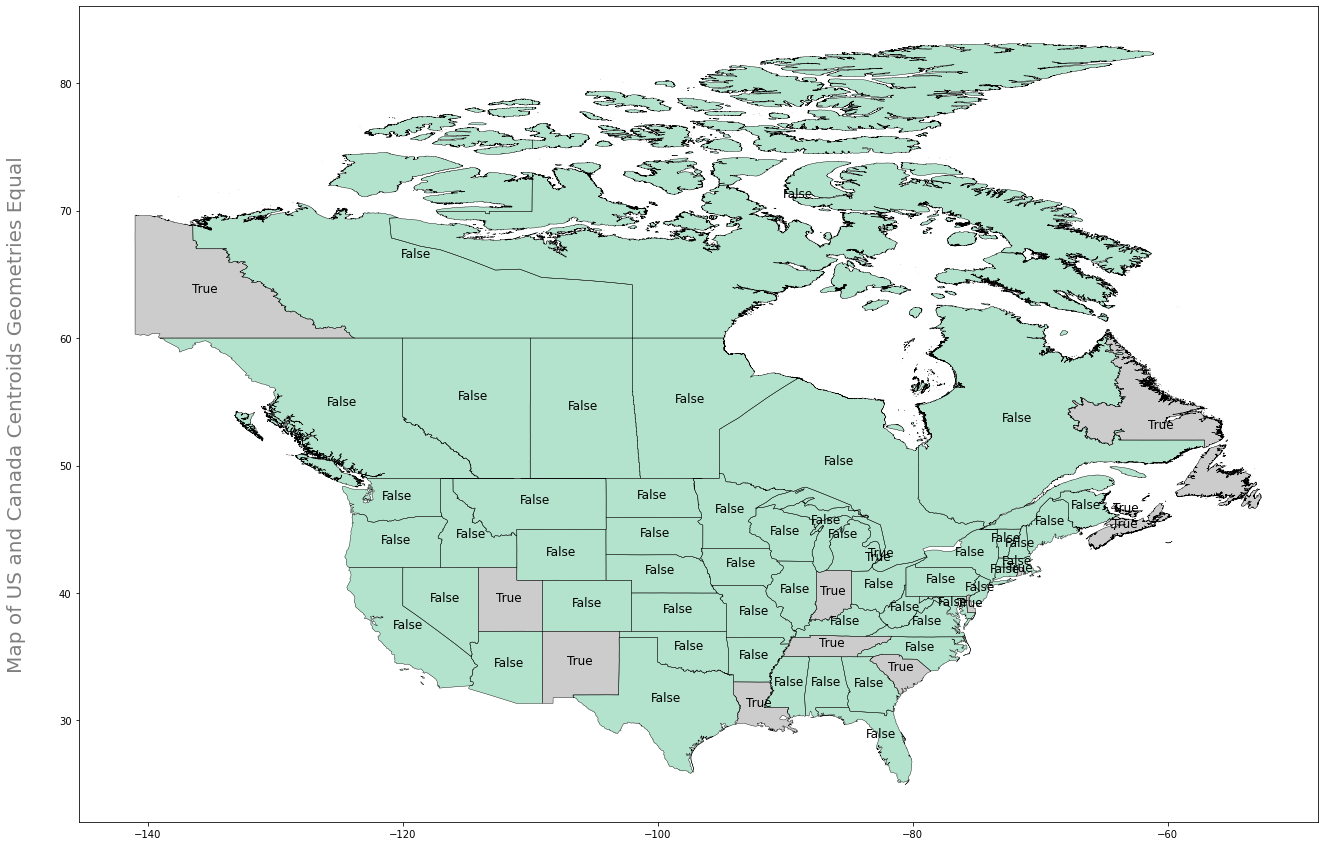

In [23]:

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
pe.apply(lambda x: ax.annotate(text=x['equals'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=12),axis=1);
pe.boundary.plot(ax=ax, color='Black', linewidth=.4)
pe.plot(ax=ax,column='equals', cmap='Pastel2', figsize=(12, 12))
ax.text(-0.05, 0.5, "Map of US and Canada Centroids Geometries Equal", transform=ax.transAxes,
        fontsize=20, color='black', alpha=0.5,
        ha='center', va='center', rotation='90')

### Centroids Geometries Almost Equals 

In [24]:
pe.groupby(['almost_equals']).size()

almost_equals
False    14
True     50
dtype: int64

Text(-0.05, 0.5, 'Map of US and Canada Centroid Geoms Almost Equal')

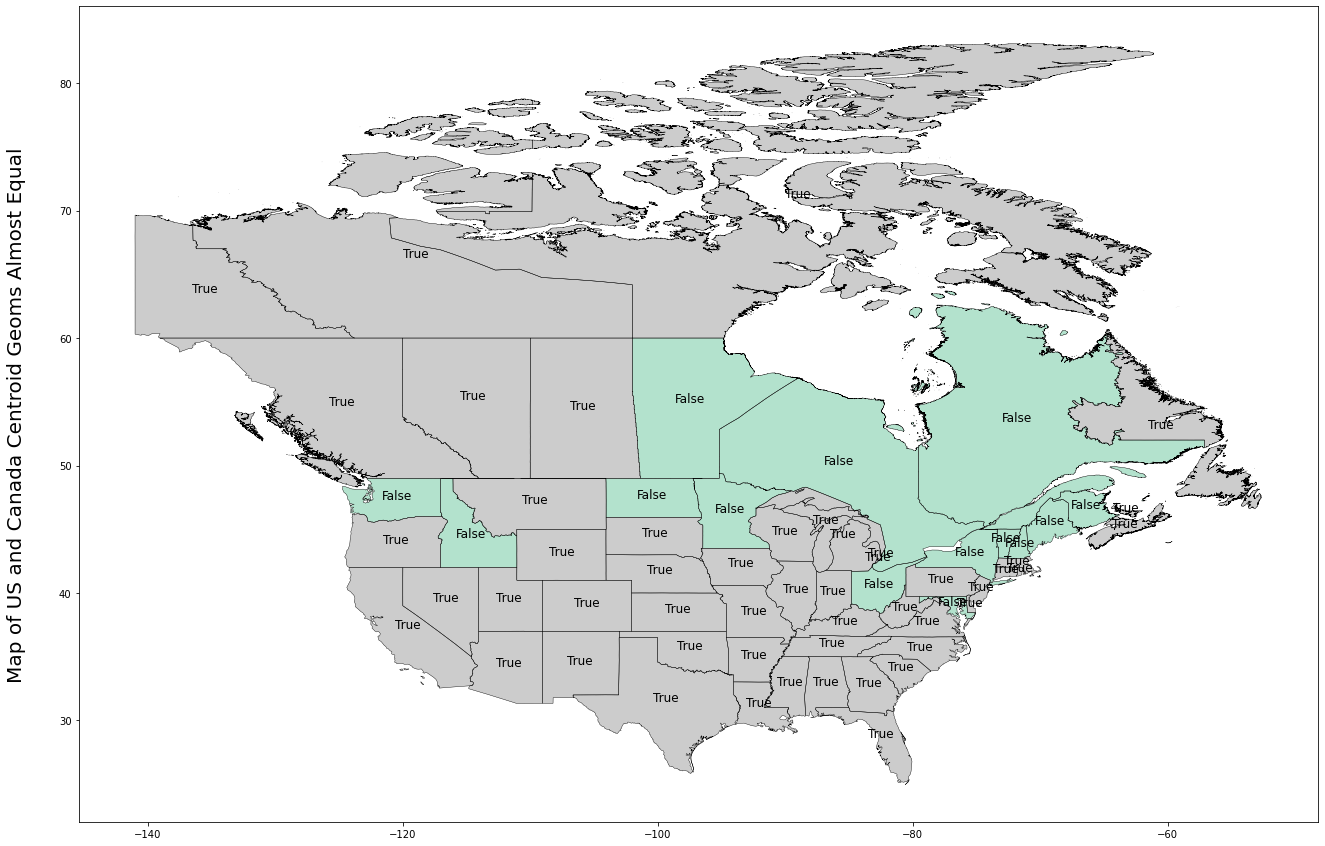

In [25]:

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
pe.apply(lambda x: ax.annotate(text=x['almost_equals'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=12),axis=1);
pe.boundary.plot(ax=ax, color='Black', linewidth=.4)
pe.plot(ax=ax,column='almost_equals', cmap='Pastel2', figsize=(12, 12))
ax.text(-0.05, 0.5, "Map of US and Canada Centroid Geoms Almost Equal", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

### Centroids Geometries Almost Equals Full

In [26]:
pe.groupby(['almost_equals_full']).size()

almost_equals_full
False    50
True     14
dtype: int64

Text(-0.05, 0.5, 'Map of US and Canada Centroid Geoms Almost Equal Full ')

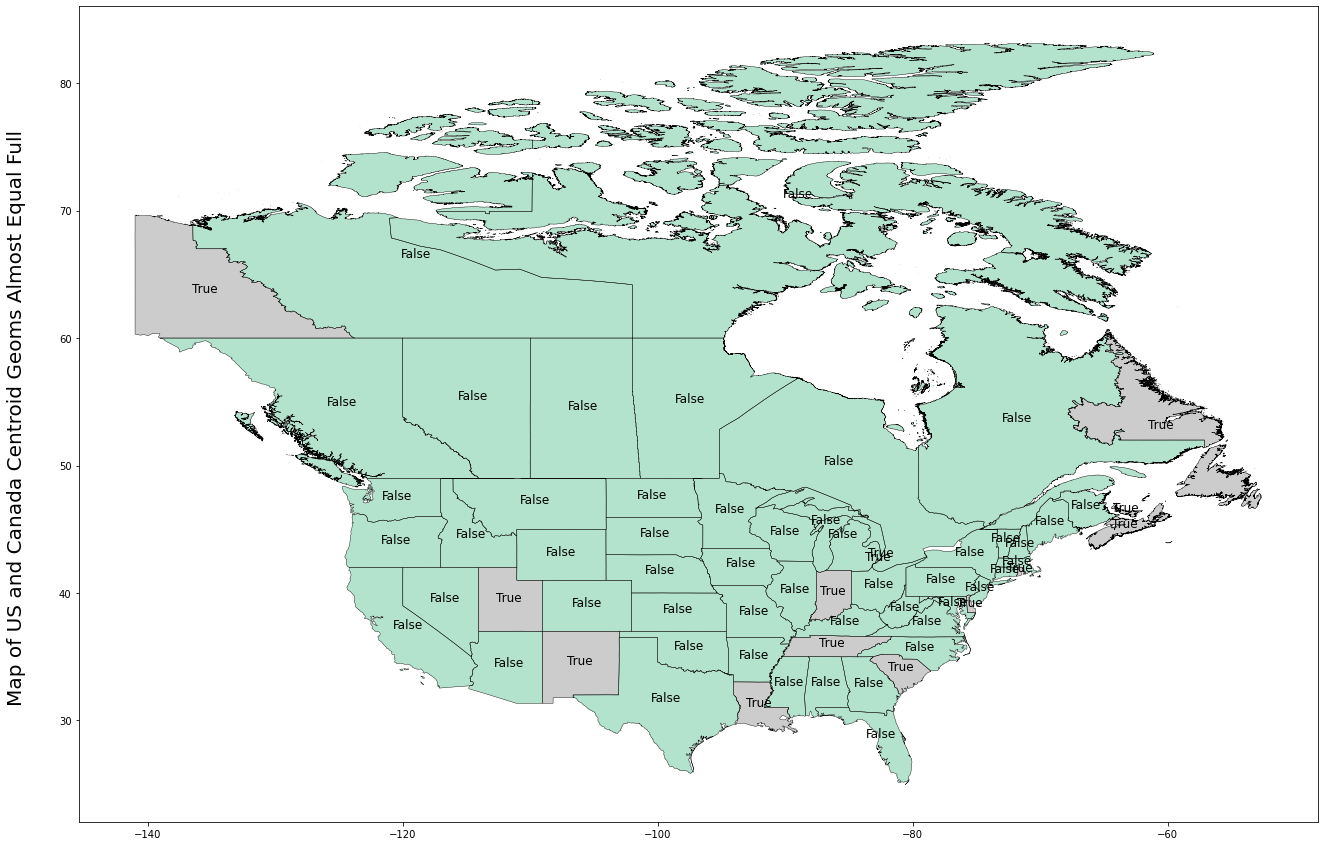

In [27]:

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
pe.apply(lambda x: ax.annotate(text=x['almost_equals_full'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=12),axis=1);
pe.boundary.plot(ax=ax, color='Black', linewidth=.4)
pe.plot(ax=ax, column='almost_equals_full', cmap='Pastel2', figsize=(12, 12))
ax.text(-0.05, 0.5, "Map of US and Canada Centroid Geoms Almost Equal Full ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

### Centroids Geometries Almost Exact

In [28]:
pe.groupby(['equals_exact']).size()

equals_exact
False    14
True     50
dtype: int64

Text(-0.05, 0.5, 'Map of US and Canada Centroid Geometries Equals Exact ')

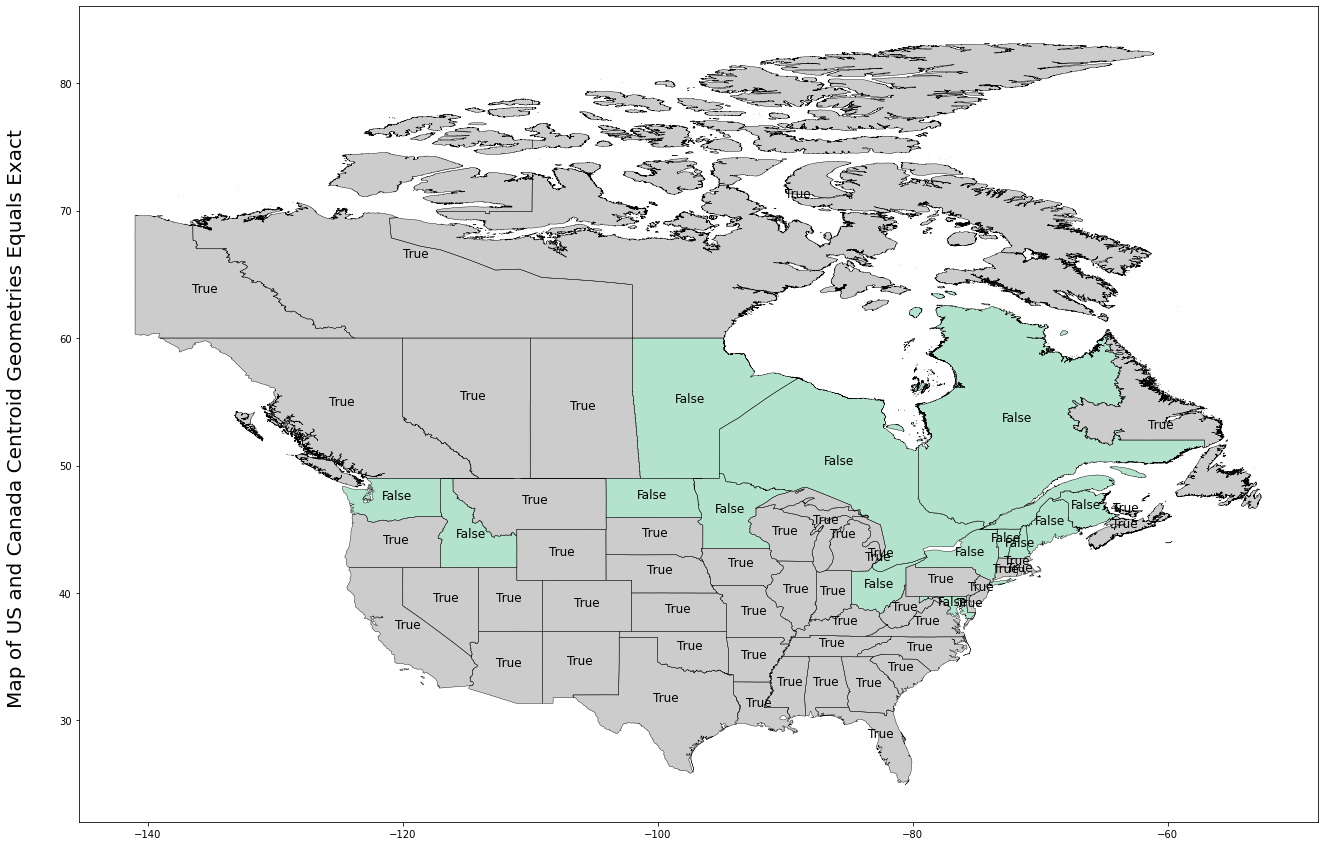

In [29]:

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
pe.apply(lambda x: ax.annotate(text=x['equals_exact'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=12),axis=1);
pe.boundary.plot(ax=ax, color='Black', linewidth=.4)
pe.plot(ax=ax,column='equals_exact', cmap='Pastel2', figsize=(12, 12))
ax.text(-0.05, 0.5, "Map of US and Canada Centroid Geometries Equals Exact ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

Based on the type of specifications we get different results.

## 2. Comparison of Area


- Check all areas before and after geoplanar
- Compare /Contrast
- Explicitly state which ones changed

In [30]:
non_planar_enforced_area = npe
planar_enforced_area = pe

In [31]:
non_planar_enforced_area = non_planar_enforced_area.set_crs('epsg:3857')
planar_enforced_area= planar_enforced_area.set_crs('epsg:3857')

In [32]:
non_planar_enforced_area["area"] = non_planar_enforced_area['geometry'].area.round(decimals = 3)

In [33]:
planar_enforced_area["area"] = planar_enforced_area['geometry'].area.round(decimals = 3)

In [34]:
planar_enforced_area.columns

Index(['level_0', 'geometry', 'COUNTRY', 'index', 'AREA', 'PERIMETER',
       'STATE_', 'STATE_ID', 'STATE_NAME', 'STATE_FIPS', 'SUB_REGION',
       'STATE_ABBR', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1',
       'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'equals',
       'almost_equals', 'almost_equals_full', 'equals_exact', 'area'],
      dtype='object')

#### Ploting the areas for non planar enforced data

Text(-0.05, 0.5, 'Non Planar Enforced Areas of Polygons ')

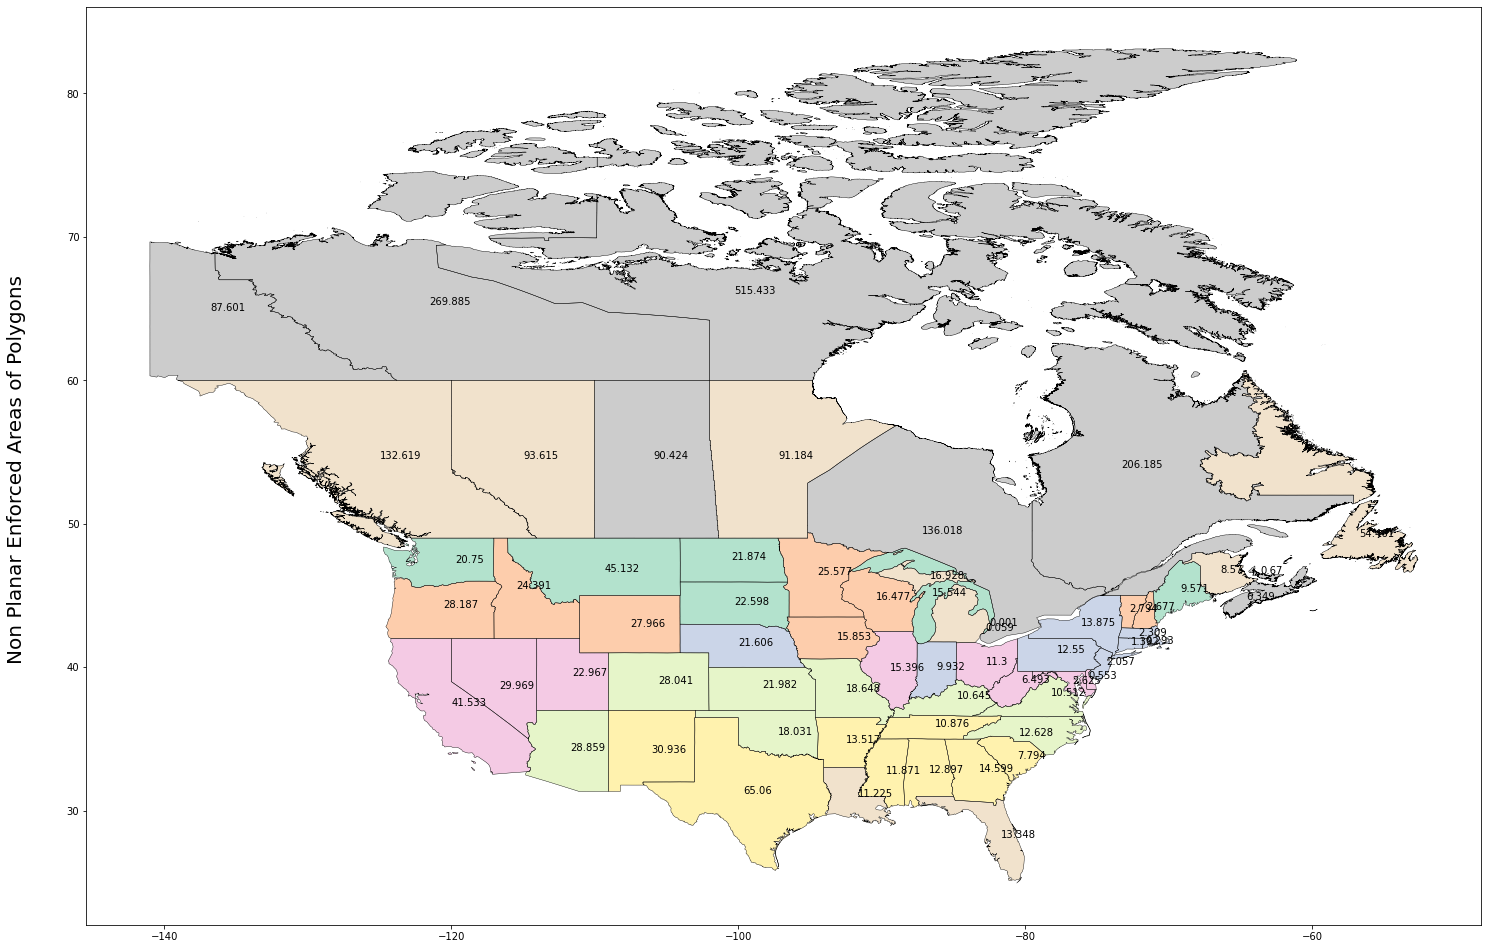

In [35]:

non_planar_enforced_area['coords'] = non_planar_enforced_area['geometry'].apply(lambda x: x.representative_point().coords[:])
non_planar_enforced_area['coords'] = [coords[0] for coords in non_planar_enforced_area['coords']]
fig, ax = plt.subplots(figsize = (25,20))

non_planar_enforced_area.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
non_planar_enforced_area.boundary.plot(ax=ax, color='Black', linewidth=.4)
                              
for idx, row in non_planar_enforced_area.iterrows():
   plt.annotate(text=row['area'], xy=row['coords'] )
ax.text(-0.05, 0.5, "Non Planar Enforced Areas of Polygons ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

#### Ploting the areas for planar enforced data

Text(-0.05, 0.5, 'Planar Enforced Areas of Polygons ')

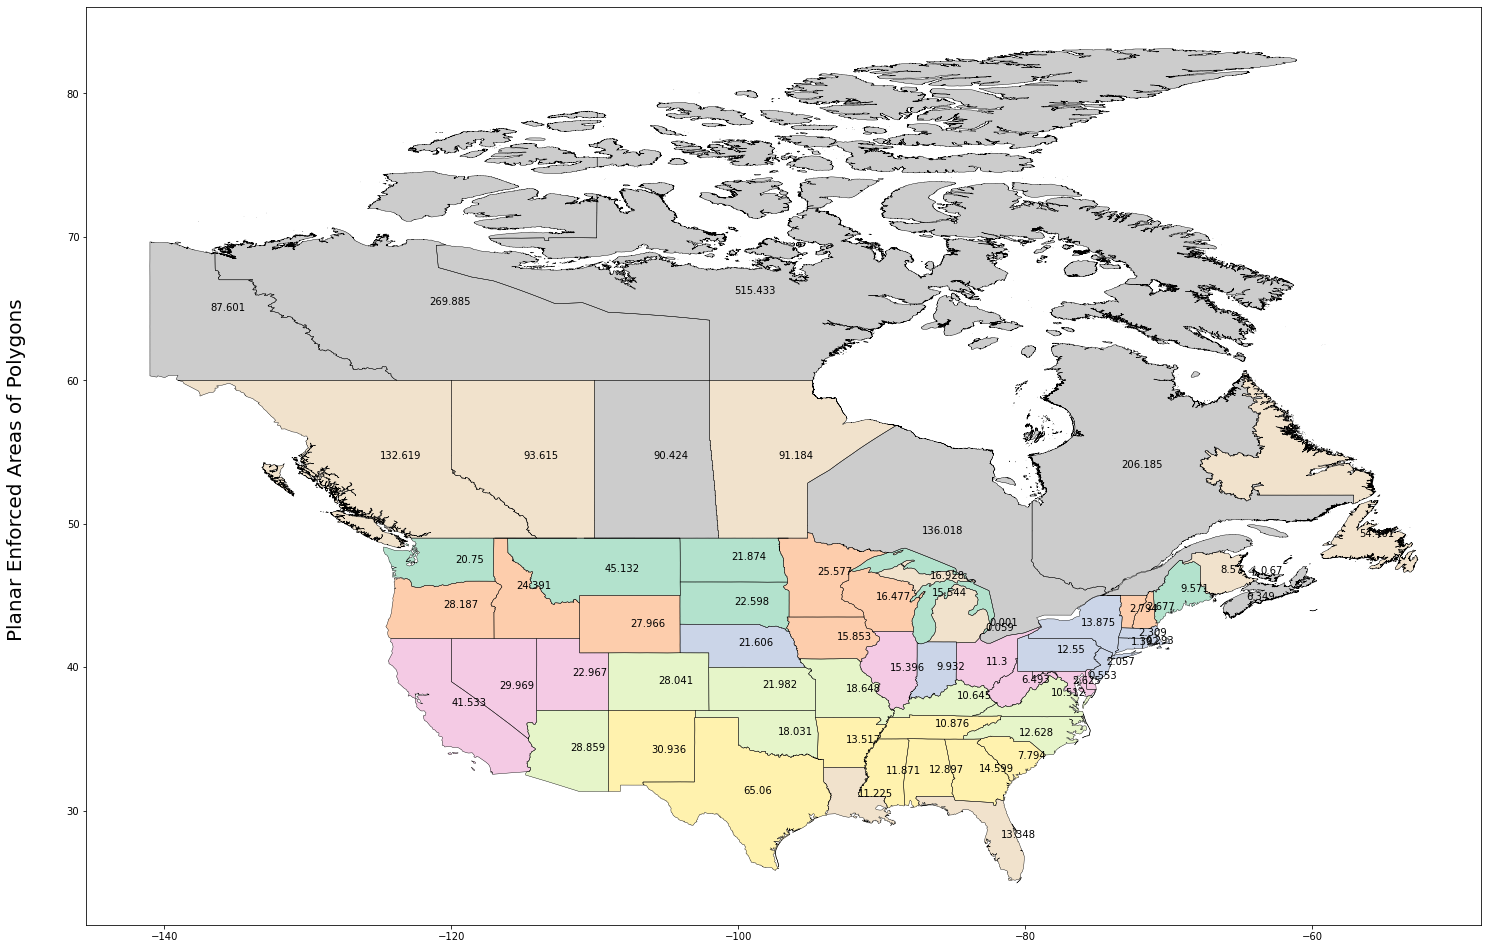

In [36]:

planar_enforced_area['coords'] = non_planar_enforced_area['geometry'].apply(lambda x: x.representative_point().coords[:])
planar_enforced_area['coords'] = [coords[0] for coords in non_planar_enforced_area['coords']]
fig, ax = plt.subplots(figsize = (25,20))

planar_enforced_area.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
planar_enforced_area.boundary.plot(ax=ax, color='Black', linewidth=.4)
                              
for idx, row in non_planar_enforced_area.iterrows():
   plt.annotate(text=row['area'], xy=row['coords'])
ax.text(-0.05, 0.5, "Planar Enforced Areas of Polygons ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

### Looking at the areas for each Polygon

In [37]:
non_planar_enforced_area["area"] = non_planar_enforced_area['geometry'].area

In [38]:
print(non_planar_enforced_area.area)

0      15.543974
1       0.000533
2       0.058636
3      20.749831
4      45.131677
         ...    
59    136.017824
60      0.670316
61    206.184961
62     90.424490
63     87.600875
Length: 64, dtype: float64


In [39]:
planar_enforced_area["area"] = planar_enforced_area['geometry'].area

In [40]:
print(planar_enforced_area.area)

0      15.543974
1       0.000533
2       0.058636
3      20.750731
4      45.131687
         ...    
59    136.010019
60      0.670316
61    206.177792
62     90.424490
63     87.600875
Length: 64, dtype: float64


In [41]:
planar_enforced_area['area'].isin(non_planar_enforced_area['area']).value_counts()

True     43
False    21
Name: area, dtype: int64

#### Identify the areas that are same in both data sets

In [42]:
df_common = planar_enforced_area.loc[planar_enforced_area['area'].isin(non_planar_enforced_area['area'])]

<AxesSubplot:>

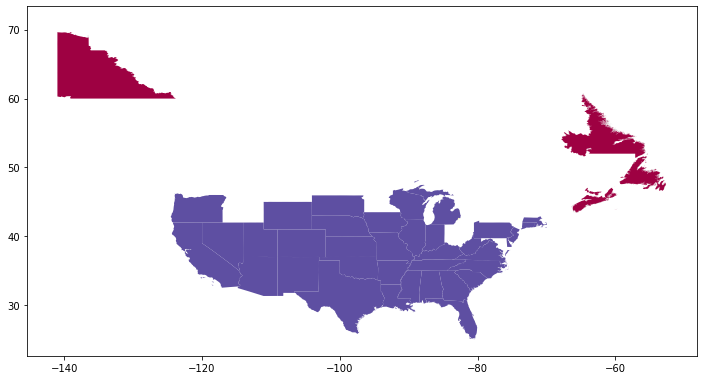

In [43]:
df_common.plot(column='COUNTRY',cmap='Spectral', figsize=(12, 12)) # ploting the polygons that have areas equal before and after groplanar


## Putting the areas into a separate dataframe

In [44]:
data = planar_enforced_area.area
data2 = non_planar_enforced_area.area
df = pd.DataFrame(data , columns = ['planar enforced area'])


In [45]:
df

,planar enforced area
0,15.543974
1,0.000533
2,0.058636
3,20.750731
4,45.131687
...,...
59,136.010019
60,0.670316
61,206.177792
62,90.424490


In [46]:
df["non planar enforced area"]= non_planar_enforced_area.area

In [47]:
df['difference'] = df['planar enforced area'] - df['non planar enforced area'] #taking the difference

In [48]:
df.tail(20)

,planar enforced area,non planar enforced area,difference
44,11.870990,11.870990,0.000000e+00
45,14.598796,14.598796,0.000000e+00
46,7.794397,7.794397,0.000000e+00
47,13.517338,13.517338,0.000000e+00
48,11.224646,11.224646,0.000000e+00
49,13.347713,13.347713,0.000000e+00
50,16.927959,16.927959,0.000000e+00
51,93.614624,93.614624,1.136868e-12
52,132.618869,132.618886,-1.625585e-05
53,91.183156,91.184485,-1.328786e-03


In [49]:
# testing for equality/different ways
df['C2'] = df['planar enforced area'].equals(df['non planar enforced area']).astype(int) # 0 is false

df['C3'] = np.where((df['planar enforced area'] == df['non planar enforced area']),1,0)

def fun(row):
    if row['planar enforced area'] == row['non planar enforced area']:
        return 1
    else:
        return 0
df['C4'] = df.apply(fun, axis=1)

df['C5'] = df.apply(lambda x : 1 if x['planar enforced area'] == x['non planar enforced area'] else 0, axis=1)


In [50]:
df.tail(21)

,planar enforced area,non planar enforced area,difference,C2,C3,C4,C5
43,12.897117,12.897117,0.000000e+00,0,1,1,1
44,11.870990,11.870990,0.000000e+00,0,1,1,1
45,14.598796,14.598796,0.000000e+00,0,1,1,1
46,7.794397,7.794397,0.000000e+00,0,1,1,1
47,13.517338,13.517338,0.000000e+00,0,1,1,1
48,11.224646,11.224646,0.000000e+00,0,1,1,1
49,13.347713,13.347713,0.000000e+00,0,1,1,1
50,16.927959,16.927959,0.000000e+00,0,1,1,1
51,93.614624,93.614624,1.136868e-12,0,0,0,0
52,132.618869,132.618886,-1.625585e-05,0,0,0,0


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

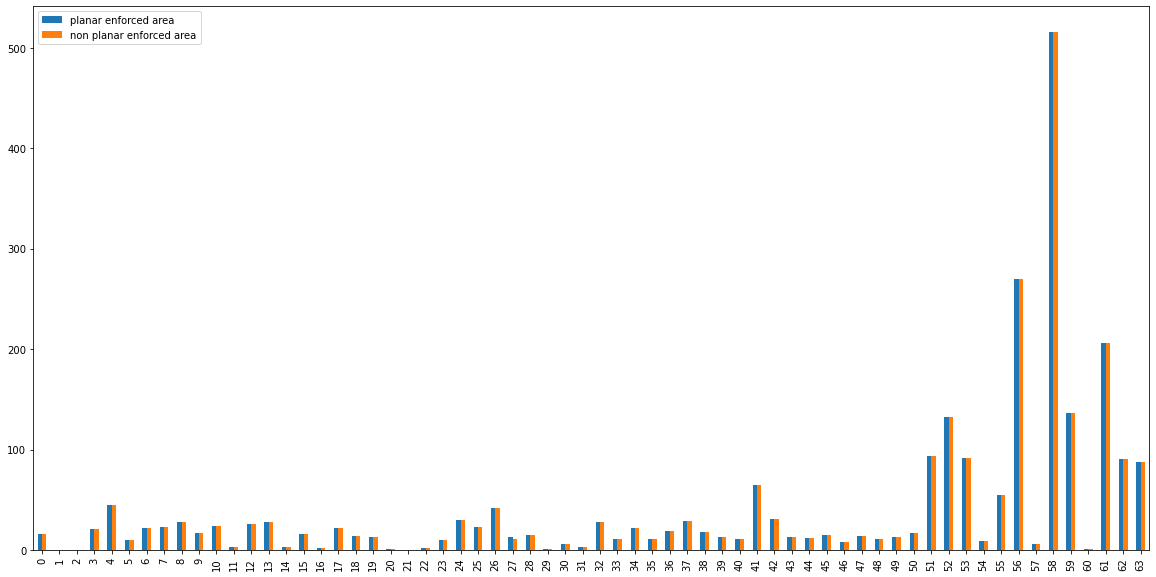

In [51]:
# bar plot of areas of the planar enforced and non planar enforced for comparison
plt.figure();
df[['planar enforced area','non planar enforced area' ]].plot.bar(figsize=(20, 10))

In [52]:
df2 = df[df.C5 == 0] # subset to look at areas that are not equal

In [53]:
df2.shape # there are 21 polygons that are different

(21, 7)

In [54]:
df2.head(21)

,planar enforced area,non planar enforced area,difference,C2,C3,C4,C5
0,15.543974,15.543974,7.105427e-15,0,0,0,0
3,20.750731,20.749831,8.999905e-04,0,0,0,0
4,45.131687,45.131677,9.660331e-06,0,0,0,0
5,9.583503,9.570609,1.289357e-02,0,0,0,0
6,21.878359,21.874287,4.072578e-03,0,0,0,0
10,24.392654,24.390738,1.916662e-03,0,0,0,0
11,2.804467,2.794098,1.036905e-02,0,0,0,0
12,25.609552,25.576939,3.261319e-02,0,0,0,0
14,2.679751,2.677289,2.461385e-03,0,0,0,0
18,13.887322,13.874597,1.272436e-02,0,0,0,0


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

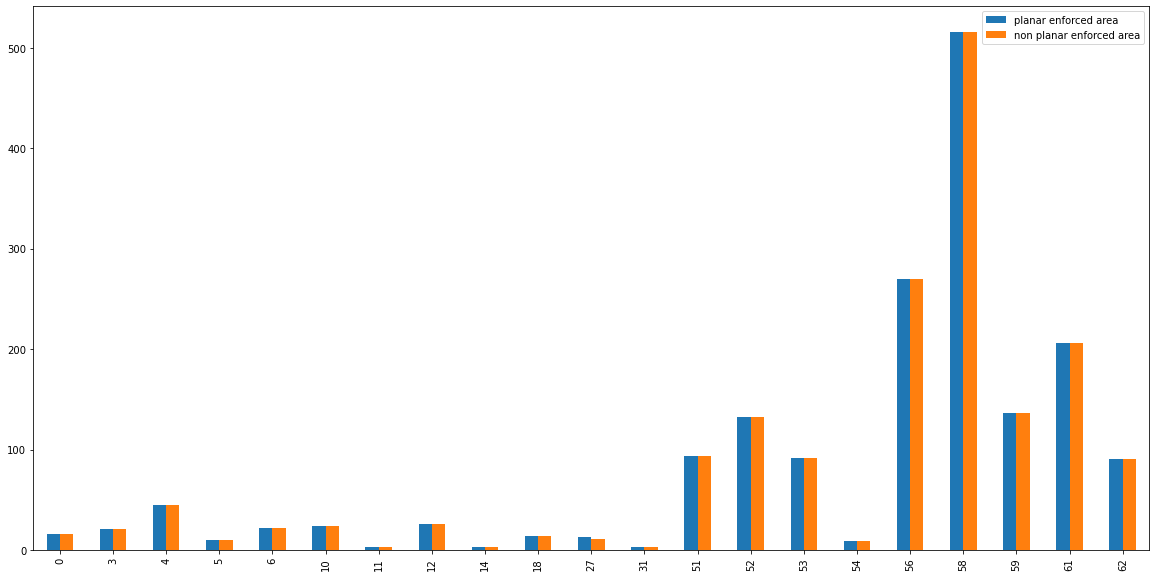

In [55]:
plt.figure(); # plotting areas that are different
df2[['planar enforced area','non planar enforced area' ]].plot.bar(figsize=(20, 10))

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

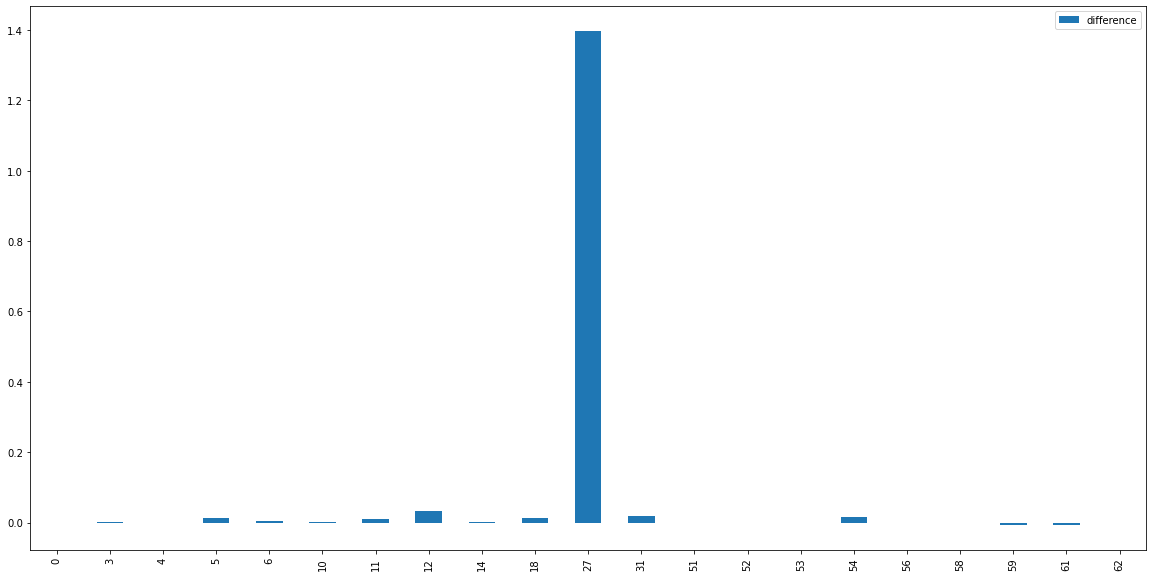

In [56]:
plt.figure(); # plotting the differences 
df2[['difference' ]].plot.bar(figsize=(20, 10))

Here we can see the changes in the areas, the 27 polygon (Ohio) has the most change. 

### Plotting the Polygons that Changed 

In [64]:
different = planar_enforced_area.iloc[['0','3','4','5','6', '10', '11', '12', '14','18', '27',
                                          '31','51', '52', '53','54', '56', '58', '59','61', '62']]

<AxesSubplot:>

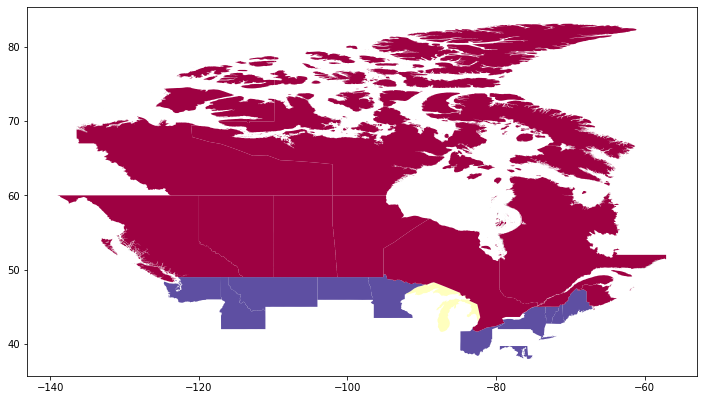

In [66]:
different.plot(column= 'COUNTRY', cmap='Spectral', figsize=(12, 12))

For the US the most changes occured near the border region. For canada the entire region has a slight change in the area of the polygons.

### Looking at the NorthWest Territories Multipolygon (Not at the border)

In [69]:
planar_enforced_area.iloc[['56']]

,level_0,geometry,COUNTRY,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,...,TYPE_1,ENGTYPE_1,CC_1,HASC_1,equals,almost_equals,almost_equals_full,equals_exact,area,coords
56,53,"MULTIPOLYGON (((-135.120 68.471, -135.120 68.4...",CANADA,5.0,NaN,NaN,NaN,NaN,None,None,...,Territoire,Territory,61,CA.NT,False,True,False,True,269.885033,-121.56222


In [81]:
NT_pe = planar_enforced_area[planar_enforced_area.NAME_1=="Northwest Territories"] 

In [82]:
NT_pe = NT_pe.explode()

In [83]:
NT_pe.iloc[1]

level_0                                                              53
COUNTRY                                                          CANADA
index                                                               5.0
AREA                                                                NaN
PERIMETER                                                           NaN
STATE_                                                              NaN
STATE_ID                                                            NaN
STATE_NAME                                                         None
STATE_FIPS                                                         None
SUB_REGION                                                         None
STATE_ABBR                                                         None
GID_0                                                               CAN
NAME_0                                                           Canada
GID_1                                                           

In [80]:
NT_npe = non_planar_enforced_area[non_planar_enforced_area.NAME_1=="Northwest Territories"] 

In [84]:
NT_npe = NT_npe.explode()

In [93]:
NT_npe.shape

(1676, 24)

In [85]:
NT_npe.iloc[1]

level_0                                                      53
COUNTRY                                                  CANADA
index                                                       5.0
AREA                                                        NaN
PERIMETER                                                   NaN
STATE_                                                      NaN
STATE_ID                                                    NaN
STATE_NAME                                                 None
STATE_FIPS                                                 None
SUB_REGION                                                 None
STATE_ABBR                                                 None
GID_0                                                       CAN
NAME_0                                                   Canada
GID_1                                                   CAN.6_1
NAME_1                                    Northwest Territories
VARNAME_1                             Te

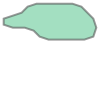

In [89]:
NT_pe.iloc[3].geometry

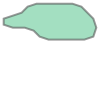

In [90]:
NT_npe.iloc[3].geometry

<AxesSubplot:>

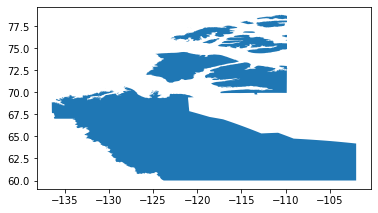

In [98]:
NT_pe.tail(1000).plot()

<AxesSubplot:>

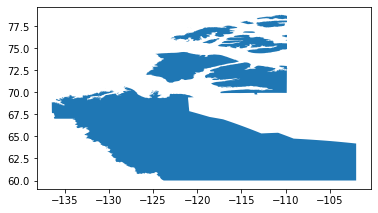

In [99]:
NT_npe.tail(1000).plot()

### Looking at the Ontario (At the border)

In [100]:
O_pe = planar_enforced_area[planar_enforced_area.NAME_1=="Ontario"] 

In [133]:
O_pe = O_pe.explode()
O_pe.iloc[5]

level_0                                                              56
COUNTRY                                                          CANADA
index                                                               8.0
AREA                                                                NaN
PERIMETER                                                           NaN
STATE_                                                              NaN
STATE_ID                                                            NaN
STATE_NAME                                                         None
STATE_FIPS                                                         None
SUB_REGION                                                         None
STATE_ABBR                                                         None
GID_0                                                               CAN
NAME_0                                                           Canada
GID_1                                                           

In [103]:
O_npe = non_planar_enforced_area[non_planar_enforced_area.NAME_1=="Ontario"] 

In [134]:
O_npe = O_npe.explode()
O_npe.iloc[5]

level_0                                                      56
COUNTRY                                                  CANADA
index                                                       8.0
AREA                                                        NaN
PERIMETER                                                   NaN
STATE_                                                      NaN
STATE_ID                                                    NaN
STATE_NAME                                                 None
STATE_FIPS                                                 None
SUB_REGION                                                 None
STATE_ABBR                                                 None
GID_0                                                       CAN
NAME_0                                                   Canada
GID_1                                                   CAN.9_1
NAME_1                                                  Ontario
VARNAME_1                               

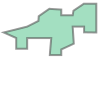

In [135]:
O_pe.iloc[5].geometry

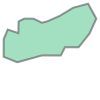

In [136]:
O_npe.iloc[5].geometry

<AxesSubplot:>

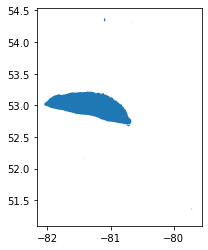

In [107]:
O_pe.tail(20).plot()

<AxesSubplot:>

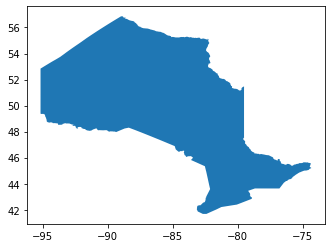

In [108]:
O_npe.tail(20).plot()

### Looking at the Montana  (At the border)

In [116]:
m_pe = planar_enforced_area[planar_enforced_area.STATE_NAME=="Montana"] 

In [117]:
m_npe = non_planar_enforced_area[non_planar_enforced_area.STATE_NAME=="Montana"] 

In [138]:
m_pe = m_pe.explode()
m_pe.iloc[0]

level_0                                                               1
COUNTRY                                                              US
index                                                               1.0
AREA                                                             45.132
PERIMETER                                                        34.527
STATE_                                                              2.0
STATE_ID                                                            2.0
STATE_NAME                                                      Montana
STATE_FIPS                                                           30
SUB_REGION                                                          Mtn
STATE_ABBR                                                           MT
GID_0                                                              None
NAME_0                                                             None
GID_1                                                           

In [120]:
m_npe = m_npe.explode()
m_npe.iloc[0]

level_0                                                       1
COUNTRY                                                      US
index                                                       1.0
AREA                                                     45.132
PERIMETER                                                34.527
STATE_                                                      2.0
STATE_ID                                                    2.0
STATE_NAME                                              Montana
STATE_FIPS                                                   30
SUB_REGION                                                  Mtn
STATE_ABBR                                                   MT
GID_0                                                      None
NAME_0                                                     None
GID_1                                                      None
NAME_1                                                     None
VARNAME_1                               

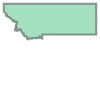

In [153]:
m_pe.iloc[0].geometry

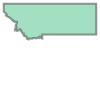

In [122]:
m_npe.iloc[0].geometry

### Looking at the Texas( Not At the border)

In [139]:
tx_pe = planar_enforced_area[planar_enforced_area.STATE_NAME=="Texas"] 

In [140]:
tx_npe = non_planar_enforced_area[non_planar_enforced_area.STATE_NAME=="Texas"] 

In [141]:
tx_pe = tx_pe.explode()
tx_pe.iloc[0]

level_0                                                              38
COUNTRY                                                              US
index                                                              38.0
AREA                                                              65.06
PERIMETER                                                        64.807
STATE_                                                             40.0
STATE_ID                                                           40.0
STATE_NAME                                                        Texas
STATE_FIPS                                                           48
SUB_REGION                                                      W S Cen
STATE_ABBR                                                           TX
GID_0                                                              None
NAME_0                                                             None
GID_1                                                           

In [142]:
tx_npe = tx_npe.explode()
tx_npe.iloc[0]

level_0                                                      38
COUNTRY                                                      US
index                                                      38.0
AREA                                                      65.06
PERIMETER                                                64.807
STATE_                                                     40.0
STATE_ID                                                   40.0
STATE_NAME                                                Texas
STATE_FIPS                                                   48
SUB_REGION                                              W S Cen
STATE_ABBR                                                   TX
GID_0                                                      None
NAME_0                                                     None
GID_1                                                      None
NAME_1                                                     None
VARNAME_1                               

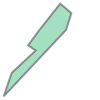

In [150]:
tx_pe.iloc[3].geometry

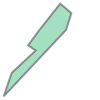

In [151]:
tx_npe.iloc[3].geometry

### Looking at the Maine( At the border)

In [154]:
maine_pe = planar_enforced_area[planar_enforced_area.STATE_NAME=="Maine"] 

In [155]:
maine_npe = non_planar_enforced_area[non_planar_enforced_area.STATE_NAME=="Maine"] 

In [156]:
maine_pe = maine_pe.explode()
maine_pe.iloc[0]

level_0                                                               2
COUNTRY                                                              US
index                                                               2.0
AREA                                                              9.571
PERIMETER                                                        18.899
STATE_                                                              3.0
STATE_ID                                                            3.0
STATE_NAME                                                        Maine
STATE_FIPS                                                           23
SUB_REGION                                                        N Eng
STATE_ABBR                                                           ME
GID_0                                                              None
NAME_0                                                             None
GID_1                                                           

In [157]:
maine_npe = maine_npe.explode()
maine_npe.iloc[0]

level_0                                                       2
COUNTRY                                                      US
index                                                       2.0
AREA                                                      9.571
PERIMETER                                                18.899
STATE_                                                      3.0
STATE_ID                                                    3.0
STATE_NAME                                                Maine
STATE_FIPS                                                   23
SUB_REGION                                                N Eng
STATE_ABBR                                                   ME
GID_0                                                      None
NAME_0                                                     None
GID_1                                                      None
NAME_1                                                     None
VARNAME_1                               

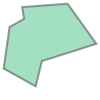

In [163]:
maine_pe.iloc[0].geometry

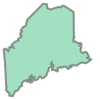

In [164]:
maine_npe.iloc[0].geometry